# Item/Content Based Recommendation System
- Recommends movies that are most similar based on users' inputted ratings
- We only factor in ratings
- Potential improvement: factor in other information about the film ~ user-user, movie tags, etc.

In [1]:
import pandas as pd # series objects, good for complex calculations, and matrix manipulations
import numpy as np # multi-dimension arrays, good for constructing matrix
import matplotlib as plt

In [2]:
pd.__version__

'0.25.3'

In [3]:
# Load the Ratings dataset using Pandas.read_csv

df = pd.read_csv('C:/Users/Christine/Downloads/ml-latest/ratings.csv', sep=',')

In [4]:
df.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [5]:
# Load Movies dataset using Pandas.read_csv

Movietitles = pd.read_csv('C:/Users/Christine/Downloads/ml-latest/movies.csv', sep=',')

In [6]:
Movietitles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Merge the two datasets on 'movieID' to get a combined view and replace old df with new df

df = pd.merge(df, Movietitles, on = 'movieId')

In [8]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,307,3.5,1256677221,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,6,307,4.0,832059248,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
2,56,307,4.0,1383625728,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,71,307,5.0,1257795414,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
4,84,307,3.0,999055519,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama


In [9]:
df.describe()

,userId,movieId,rating,timestamp
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00,1.193122e+09
std,8.170740e+04,3.510263e+04,1.066353e+00,2.160482e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,7.117600e+04,1.097000e+03,3.000000e+00,9.986053e+08
50%,1.420220e+05,2.716000e+03,3.500000e+00,1.174256e+09
75%,2.124590e+05,7.150000e+03,4.000000e+00,1.422744e+09
max,2.832280e+05,1.938860e+05,5.000000e+00,1.537945e+09


## Create a dataframe with the average rating for each movie and the number of ratings
- We will then calculate the correlation coefficient between movies
- Create a dataframe with the average rating for each movie and the number of ratings
- See the relationship between the average rating of a movie and the number of ratings the movie got

    
    

In [10]:
# Group by the title and list out the average rating for each title

ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [11]:
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.815556
#1 Cheerleader Camp (2010),2.777778
#Captured (2017),2.500000
#Horror (2015),2.078947
#SCREAMERS (2016),2.500000


In [12]:
# Create a new column called 'number_of_ratings' and find the count in each movie title group
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
"""Great Performances"" Cats (1998)",2.815556,225
#1 Cheerleader Camp (2010),2.777778,9
#Captured (2017),2.500000,1
#Horror (2015),2.078947,19
#SCREAMERS (2016),2.500000,1


In [28]:
ratings['rating_bins'] = pd.cut(x=ratings['rating'], bins=[1, 2, 3, 4, 5])
ratings.head()

,rating,number_of_ratings,rating_bins
title,,,
"""Great Performances"" Cats (1998)",2.815556,225,"(2, 3]"
#1 Cheerleader Camp (2010),2.777778,9,"(2, 3]"
#Captured (2017),2.500000,1,"(2, 3]"
#Horror (2015),2.078947,19,"(2, 3]"
#SCREAMERS (2016),2.500000,1,"(2, 3]"


## Pyplot from Matplotlib

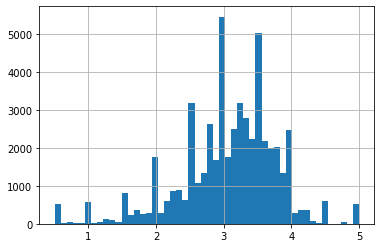

In [15]:
import matplotlib.pyplot as plt
# magic line/similar to command line that keeps static images in notebook
%matplotlib inline 
ratings['rating'].hist(bins=50) #create a histogram with 50 bins so that there's more detail

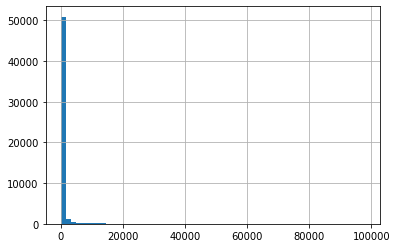

In [16]:
ratings['number_of_ratings'].hist(bins=60)

## Seaborn 
- plotting library based on matplotlib
- the more the ratings a movie gets the higher the average rating it gets
- positive relationship between the average rating of a movie and the number of ratings

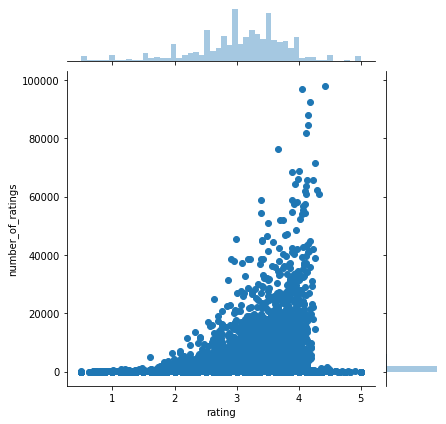

In [17]:
# Create a jointplot that shows a histogram and scatterplot
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings) #creates a stacked graph

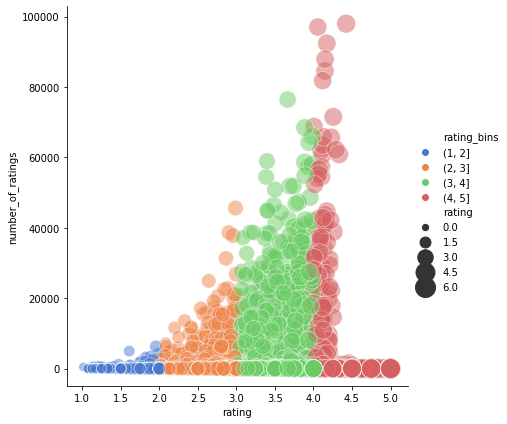

In [30]:
sns.relplot(x="rating", y="number_of_ratings", hue = "rating_bins", size = 'rating',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=ratings)

## Item based Recommender System
A form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items

1. Convert our dataset into a matrix
2. User_id is index (rows), movie titles (columns), rating (values)
3. Get a dataframe with the columns as the movie titles and the rows as the user ids

In [31]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings,rating_bins
title,,,
"Shawshank Redemption, The (1994)",4.424188,97999,"(4, 5]"
Forrest Gump (1994),4.056585,97040,"(4, 5]"
Pulp Fiction (1994),4.173971,92406,"(4, 5]"
"Silence of the Lambs, The (1991)",4.151412,87899,"(4, 5]"
"Matrix, The (1999)",4.149695,84545,"(4, 5]"
Star Wars: Episode IV - A New Hope (1977),4.120455,81815,"(4, 5]"
Jurassic Park (1993),3.665034,76451,"(3, 4]"
Schindler's List (1993),4.257502,71516,"(4, 5]"
Braveheart (1995),4.008481,68803,"(4, 5]"


In [21]:
# Total rows = 27,753,444
# 0.50 = 13876722
# 0.75 = 20815083
movie_training = df[:13876722]

# Create a pivot table userid x movietitles
user_movie_ratings = movie_training.pivot_table(index='userId', columns='title', values='rating')

In [19]:
user_movie_ratings

title,*batteries not included (1987),12 Angry Men (1957),13 Going on 30 (2004),15 Minutes (2001),16 Blocks (2006),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),25th Hour (2002),28 Weeks Later (2007),...,"World Is Not Enough, The (1999)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),Yes Man (2008),You Only Live Twice (1967),You've Got Mail (1998),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1.5,1.0,3.0,4.5,2.0,4.0,4.0,2.5,4.0,...,4.0,3.0,4.5,4.5,NaN,4.5,2.5,3.5,3.5,3.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283224,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Find the movie ratings for Forrest Gump
forrest_gump_rating = user_movie_ratings['Forrest Gump (1994)']

In [24]:
# List of forrest gump movie ratings for all users

forrest_gump_rating.head()

userId
1    NaN
2    NaN
3    NaN
4    3.5
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [29]:
# Calculate pairwise correlation between Forrest Gump and ALL other movie ratings
movies_like_forest_gump = user_movie_ratings.corrwith(forrest_gump_rating) 
movies_like_forest_gump

title
*batteries not included (1987)    0.257426
12 Angry Men (1957)               0.164272
13 Going on 30 (2004)             0.159777
15 Minutes (2001)                 0.246826
16 Blocks (2006)                  0.174607
                                    ...   
You Only Live Twice (1967)        0.180952
You've Got Mail (1998)            0.299993
eXistenZ (1999)                   0.028631
xXx (2002)                        0.131284
¡Three Amigos! (1986)             0.175824
Length: 987, dtype: float64

In [30]:
# Create a new dataframe with each movie and their correlation value with forrest gump
corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])

# Remove the missing values 
corr_forrest_gump.dropna(inplace=True)

# Unordered correlations
corr_forrest_gump

,Correlation
title,
*batteries not included (1987),0.257426
12 Angry Men (1957),0.164272
13 Going on 30 (2004),0.159777
15 Minutes (2001),0.246826
16 Blocks (2006),0.174607
...,...
You Only Live Twice (1967),0.180952
You've Got Mail (1998),0.299993
eXistenZ (1999),0.028631


In [31]:
# Sort movies from most to least similar

corr_forrest_gump.sort_values('Correlation', ascending = False).head()

,Correlation
title,
Forrest Gump (1994),1.000000
"Green Mile, The (1999)",0.434119
Rain Man (1988),0.416268
Cast Away (2000),0.402344
Saving Private Ryan (1998),0.384719
